Recommendation Systems are software tools and techniques that provide suggestion for items that are most likely of interest to a Particular user.

General Recommendaion System takes User data and Item data, and calculate their interaction in order to provide a new recommendataion to user.

Here, we will be mainly working on Movie Recommendation System.



Recommendation System Taxonomy
2 types



1.   Non- Personalized
*   Most-Popular
*   Highest Rated

2.  Personlized

*   Content Based
*   Collaborative


1.   Nearest-Neigbour
2.   Latent Factorization -> Matrix Factorization

*   Context-aware

1.   Factorization Machine
2.   Deep Learning

*   Hybrid

















Input Data- Rating Matrix - Typically Users are arranged in rows and item on column, and each entry represent rating of user on that particular item.

Typically. rating matrix is mostly sparse, rating matrix density < 0.01%





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/ml-100/movies.csv")
dataset.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv("/content/drive/MyDrive/ml-100/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
dataframe = pd.merge(ratings,dataset, on ="movieId")
dataframe = dataframe.drop(columns = ["timestamp"])
dataframe.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataframe.shape

(100836, 5)

In [ ]:
dataframe.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [ ]:
dataframe.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    100836 non-null  object 
 4   genres   100836 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [ ]:
dataframe.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


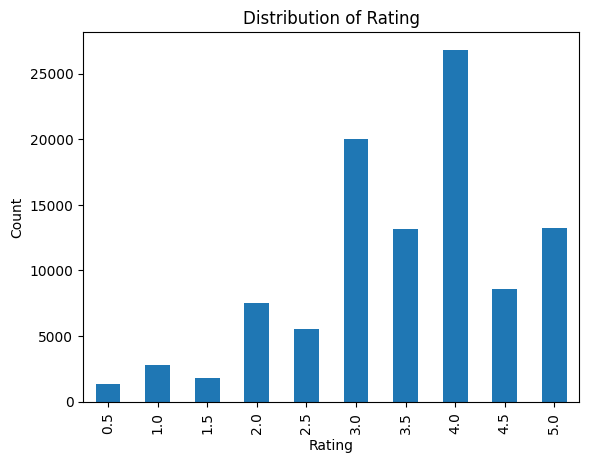

In [ ]:
dataframe['rating'].value_counts().sort_index().plot(kind="bar")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title("Distribution of Rating")
plt.show()

In [ ]:
mean_rating = dataframe.groupby('title').agg({'rating':'mean'})['rating'].sort_values(ascending=False)
mean_rating = mean_rating.to_frame()

mean_rating

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
...,...
Don't Look Now (1973),0.5
Journey 2: The Mysterious Island (2012),0.5
Joe Dirt 2: Beautiful Loser (2015),0.5


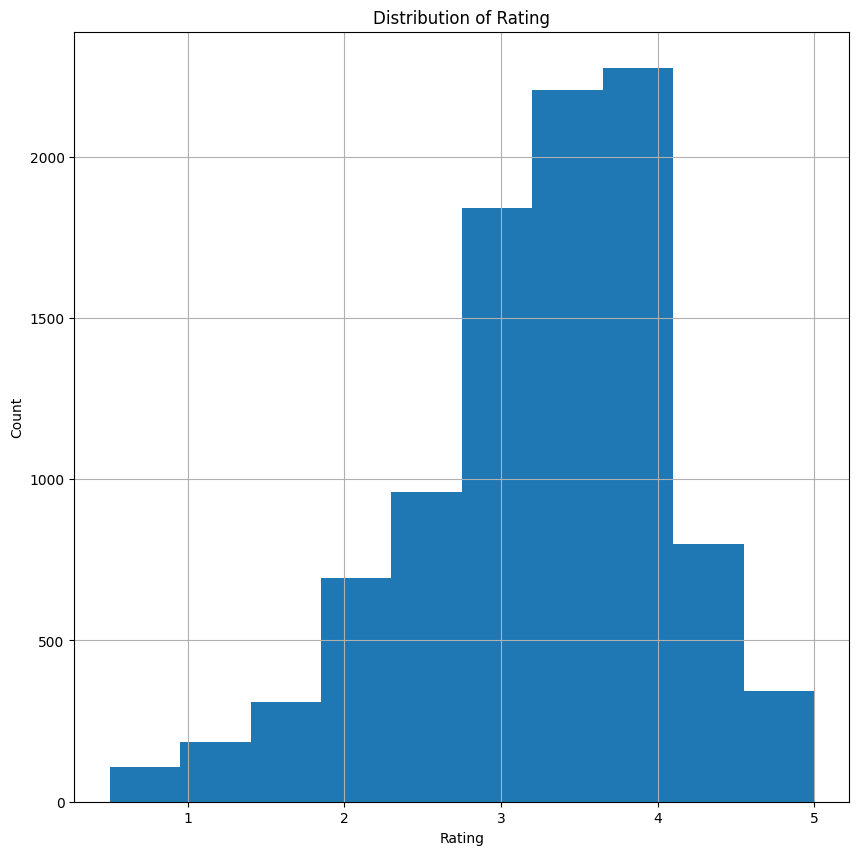

In [ ]:
mean_rating["rating"].hist(figsize=(10,10))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title("Distribution of Rating")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#Creating rating matrix with nxm shape
rating_mat = np.ndarray(shape=(np.max(dataframe["movieId"].values), np.max(dataframe["userId"].values)),dtype = np.uint8)
rating_mat[dataframe.movieId.values-1, dataframe.userId.values-1] = dataframe.rating.values
rating_mat

array([[4, 0, 0, ..., 2, 3, 5],
       [0, 0, 0, ..., 2, 0, 0],
       [4, 0, 0, ..., 2, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
#Normalization
from sklearn.preprocessing import normalize
rating_mat_norm = normalize(rating_mat)
rating_mat

array([[4, 0, 0, ..., 2, 3, 5],
       [0, 0, 0, ..., 2, 0, 0],
       [4, 0, 0, ..., 2, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Single Value Decomposition -

The essence of SVD is that it decomposes a matrix of any shape into a product of 3 matrices with nice mathematical properties: A=USV_T

A : n×m // number of records as rows and number of dimensions/features as columns.

U : n×n // orthogonal matrix containing eigenvectors of AxA_T

S : n×m // ordered singular values in the diagonal. Square root of eigenvalues associated with AxA_T  or A_TxA.

V: m×m // orthogonal matrix containing eigenvectors of A_TxA.


In [ ]:
#compute svd using numpy
U, S, V = np.linalg.svd(rating_mat_norm, full_matrices=False)

U.shape, S.shape, V.shape

((193609, 610), (610,), (610, 610))

In [ ]:
movie_data = pd.read_csv("/content/drive/MyDrive/ml-100/movies.csv")
data = pd.read_csv("/content/drive/MyDrive/ml-100/ratings.csv")

In [ ]:
#Computing the Singular Value Decomposition (SVD)

#Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1 in the dataset to account zero based indexing in python
    movie_row = data[index, :] #Extract raws corressponding to the given movies_id from the data matrix
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data)) #Calculate the length of each vector
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude) #Calculate cosine similarity between movie and all other movie
    sort_indexes = np.argsort(-similarity)  #Sort the similarity indexes in descending order
    return sort_indexes[:top_n] #Return the top N indexes

# Function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movieId == movie_id].title.values)) #Print the title of the movie
    for id in top_indexes + 1:
        # Check if a movie with the ID exists before printing
        if id in movie_data.movieId.values:
            print((movie_data[movie_data.movieId == id].title.values)[0])
        else:
            print(f"Movie with ID {id} not found in the dataset.") # Print a message if the movie ID is not found

In [ ]:
#k-principal components to represent movies, movie_id to find recommendations, top_n print n results
k = 50
movie_id = 10 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)

#Printing the top N similar movies
print_similar_movies(movie_data, movie_id, indexes)

Recommendations for ['GoldenEye (1995)']: 

GoldenEye (1995)
Movie with ID 143 not found in the dataset.
Germinal (1993)
Kids (1995)
Movie with ID 578 not found in the dataset.
Higher Learning (1995)
Murder in the First (1995)
Man Without a Face, The (1993)
Clockers (1995)
Happy Gilmore (1996)
